In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
def temps_chute(h): 
    g = 9.81
    return np.sqrt((2*h)/g)

In [3]:
d = {'h': [10, 20, 30, 40, 50, 60], 't_mes': [1.4, 1.95, 2.65, 2.8, 3.25, 3.6]}
df = pd.DataFrame(data=d)

In [4]:
df

,h,t_mes
0,10,1.40
1,20,1.95
2,30,2.65
3,40,2.80
4,50,3.25
5,60,3.60


In [5]:
import numpy as np
from scipy.optimize import least_squares

# Fonction pour le modèle non linéaire
def Ycode_Fn(XX, par): 
    return np.sqrt((2*XX)/par)
    pass

# Fonction des résidus
def myResids_fn(par, observed, XX):
    return (observed - Ycode_Fn(XX, par)) / sigOBS

# Paramètres de départ
parStart = np.array([1])

# Données observées
Yobs = np.array(df['t_mes'])
Xobs = np.array(df['h'])

# Écart type des observations 
sigOBS = 0.1

# Optimisation de la régression non linéaire
result = least_squares(myResids_fn, parStart, args=(Yobs, Xobs))

# Les paramètres estimés
estimated_params = result.x

print("Paramètres estimés:", estimated_params)


Paramètres estimés: [9.52309357]


In [6]:
import numpy as np
import autograd.numpy as anp
from autograd import jacobian, grad
from scipy.optimize import least_squares
from numdifftools import Hessian

# Paramètres
beta = 1


# Fonction 
def Ycode_Fn(XX, beta): 
    return anp.sqrt((2*XX)/beta)

# Données observées
Yobs = np.array(df['t_mes'])
print(Yobs.shape)
Xobs = np.array(df['h'])
print(Xobs.shape)
sigOBS = 0.1
Xplot = np.array(np.linspace(0,100, 100)) 

# Paramètres de départ
beta_start = np.array([beta])

# Fonction des résidus
def myResids_fn(beta, observed, XX):
    return (observed - Ycode_Fn(XX=XX, beta=beta)) / sigOBS

# Fonction pour calculer le hessien numériquement
def fun_hess(beta):
    return Hessian(lambda x: np.sum(myResids_fn(x, Yobs, Xobs)**2))(beta)

# Optimisation de la régression non linéaire avec scipy.optimize
result = least_squares(myResids_fn, beta_start, args=(Yobs, Xobs), jac='2-point')

# Calcul du hessien avec la fonction fun_hess
# Calculateur de hessien avec la fonction fun_hess
hess_calc = Hessian(lambda beta: np.sum(myResids_fn(beta, Yobs, Xobs)**2))
hess = hess_calc(result.x)

# Paramètres estimés
beta_num = result.x


# Calcul de la matrice hessienne
hessian = result.jac
Q_num = np.linalg.inv(np.dot(hessian.T, hessian))

# Calcul du gradient de Ycode.Fn
hnew = []
[hnew.append(grad(Ycode_Fn, argnum=1)(x, beta_num)) for x in Xplot]
hnew = np.array(hnew).reshape(100, 1)

# Calcul de qpred
qpred = np.sqrt(hnew * (np.dot(Q_num, hnew.T).T))
qpred = qpred.reshape((100,))
# Calcul de bmf
bmf = np.sqrt(sigOBS**2 + np.dot(hnew, np.dot(Q_num, hnew.T)))

print("Paramètres estimés (beta_num):", beta_num)
print("Matrice Q.num:", Q_num)
print("qpred:", qpred)
print("bmf:", bmf)


(6,)
(6,)
Paramètres estimés (beta_num): [9.52309357]
Matrice Q.num: [[0.0822517]]
qpred: [       nan 0.00693542 0.00980816 0.0120125  0.01387084 0.01550807
 0.01698824 0.0183494  0.01961633 0.02080626 0.02193172 0.02300219
 0.024025   0.02500601 0.02594997 0.02686077 0.02774168 0.02859547
 0.02942449 0.03023079 0.03101614 0.03178209 0.03253    0.03326111
 0.03397648 0.0346771  0.03536384 0.0360375  0.03669879 0.03734838
 0.03798686 0.03861478 0.03923266 0.03984095 0.0404401  0.0410305
 0.04161252 0.04218651 0.0427528  0.04331168 0.04386345 0.04440836
 0.04494666 0.04547859 0.04600437 0.04652421 0.04703831 0.04754684
 0.04805    0.04854794 0.04904082 0.04952881 0.05001202 0.05049062
 0.05096472 0.05143445 0.05189993 0.05236127 0.05281858 0.05327197
 0.05372153 0.05416736 0.05460955 0.05504819 0.05548336 0.05591514
 0.05634362 0.05676886 0.05719094 0.05760992 0.05802589 0.05843889
 0.05884899 0.05925625 0.05966074 0.0600625  0.06046159 0.06085806
 0.06125197 0.06164336 0.06203228 0.0624

/opt/anaconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:98: RuntimeWarning: divide by zero encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
/opt/anaconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:52: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


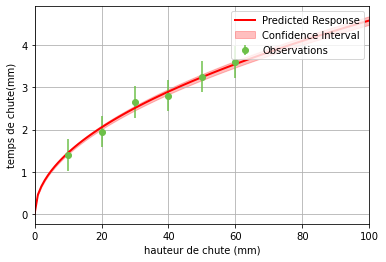

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Données observées
Yobs = np.array(df['t_mes'])
Xobs = np.array(df['h'])
sigOBS = np.std(Yobs)
Xplot = np.linspace(0, 100, 100)

# Paramètres de prédiction
myPred = Ycode_Fn(Xplot, beta_num)


# Création de la figure et des axes
fig, ax = plt.subplots()

# Plot des erreurs
ax.errorbar(Xobs, Yobs, yerr=0.5*sigOBS, fmt='o', color='#6DC048', markersize=6, label='Observations')

# Plot de la prédiction et de l'intervalle de confiance

lower_bound = myPred + 1.96 * qpred * sigOBS
upper_bound = myPred - 1.96 * qpred * sigOBS

ax.plot(Xplot, myPred, color='red', linewidth=2, label='Predicted Response')
ax.fill_between(Xplot, lower_bound, upper_bound, color='red', alpha=0.25, label='Confidence Interval')


# Paramètres d'axe et de légende
ax.set_xlabel('hauteur de chute (mm)')
ax.set_ylabel('temps de chute(mm)')
ax.set_xlim(0.0, 100)
#ax.set_ylim(-12.0, 0.0)
ax.legend(loc='upper right')

# Ajout de la grille
ax.grid(True)

# Affichage de la figure
plt.show()
